## I for ALLK 

### Note: this code includes all good pyplot parameters!! e.g. shading, axes, legend size, fonts

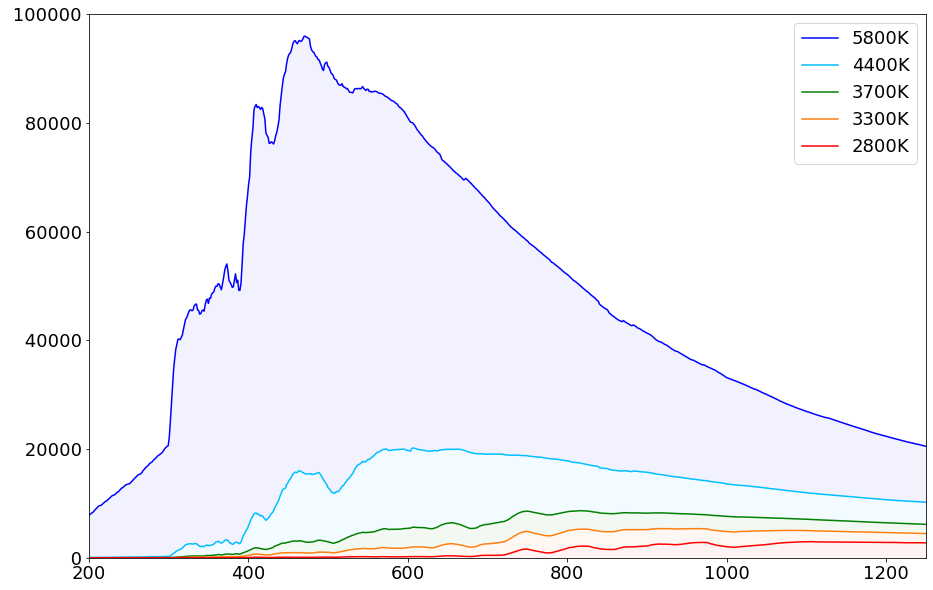

In [4]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
                               FormatStrFormatter,
                               AutoMinorLocator)

res = 1 #resolution (every 1th line is specified here)

spec_wavelength2800K = [] #creating an empty array
spec_wavelength3300K = []
spec_wavelength3700K = []
spec_wavelength4400K = []
spec_wavelength5800K = []

spec_intensity2800K = [] 
spec_intensity3300K = []
spec_intensity3700K = []
spec_intensity4400K = []
spec_intensity5800K = []

counter = 0 

min_wavelength = 1.0e+02 #setting a target min wavelength (PAR)
max_wavelength = 1.3e+03 #setting a target max wavelenth (PAR)

fin2800K = open('Smoothing/2800K_SmoothedSpectrum30000_PHOENIX.txt', 'r') 
fin3300K = open('Smoothing/3300K_SmoothedSpectrum30000_PHOENIX.txt', 'r')
fin3700K = open('Smoothing/3700K_SmoothedSpectrum30000_PHOENIX.txt', 'r')
fin4400K = open('Smoothing/4400K_SmoothedSpectrum30000_PHOENIX.txt', 'r')
fin5800K = open('Smoothing/5800K_SmoothedSpectrum30000_PHOENIX.txt', 'r')

fout2800K = open('I_2800K.txt','w') #opening the file elsewhere in directory so that you don't have to run code each time
fout3300K = open('I_3300K.txt','w')
fout3700K = open('I_3700K.txt','w')
fout4400K = open('I_4400K.txt','w')
fout5800K = open('I_5800K.txt','w')


for line in fin2800K: #for each line in the file (note: each line is a string currently, E.G. '5.5632  6.1375') 
    line = line.rstrip() #tidies up .txt file end of line messiness
    elements = line.split(' ') #split function converts a line of string into 2 stringed ELEMENTS in an array [wavelength, intensity] separated by gap of 1 (' '), E.G. ['5.5632', '6.1375'];could use ('\t') for a gap of a whole tab
    wavelength2800K = float(elements[0]) #creating variable "wavelength" to now convert the 0th termed element to a floater (integer with decimal points), E.G. 5.5632    
    intensity2800K = float(elements[1]) #creating variable "intensity" to now convert the 1st termed element to a floater (integer with decimal points), E.G. 6.1375
    counter = counter + 1 #goes through 1 line at a time
    if counter%res == 0 and wavelength2800K > min_wavelength and wavelength2800K < max_wavelength: #conditional statements: counter%res = division by every res = x (in this case 5000), i.e. include only every 5000 lines ; only include values of wavelength between target min and target max
        spec_wavelength2800K.append(wavelength2800K) #adding all floater wavelength values into the spec_1 [] array
        spec_intensity2800K.append(intensity2800K) 
        fout2800K.write(str(wavelength2800K)+'\t'+str(intensity2800K)+'\n')

for line in fin3300K: 
    line = line.rstrip() 
    elements = line.split(' ') 
    wavelength3300K = float(elements[0])
    intensity3300K = float(elements[1]) 
    counter = counter + 1
    if counter%res == 0 and wavelength3300K > min_wavelength and wavelength3300K < max_wavelength:
        spec_wavelength3300K.append(wavelength3300K) #adding all floater wavelength values into the spec_1 [] array
        spec_intensity3300K.append(intensity3300K)
        fout3300K.write(str(wavelength3300K)+'\t'+str(intensity3300K)+'\n')
    
for line in fin3700K: 
    line = line.rstrip() 
    elements = line.split(' ') 
    wavelength3700K = float(elements[0])
    intensity3700K = float(elements[1]) 
    counter = counter + 1
    if counter%res == 0 and wavelength3700K > min_wavelength and wavelength3700K < max_wavelength:
        spec_wavelength3700K.append(wavelength3700K)
        spec_intensity3700K.append(intensity3700K)
        fout3700K.write(str(wavelength3700K)+'\t'+str(intensity3700K)+'\n')
        
for line in fin4400K: 
    line = line.rstrip() 
    elements = line.split(' ') 
    wavelength4400K = float(elements[0])
    intensity4400K = float(elements[1]) 
    counter = counter + 1
    if counter%res == 0 and wavelength4400K > min_wavelength and wavelength4400K < max_wavelength:
        spec_wavelength4400K.append(wavelength4400K)
        spec_intensity4400K.append(intensity4400K)
        fout4400K.write(str(wavelength4400K)+'\t'+str(intensity4400K)+'\n')
        
for line in fin5800K: 
    line = line.rstrip() 
    elements = line.split(' ') 
    wavelength5800K = float(elements[0])
    intensity5800K = float(elements[1]) 
    counter = counter + 1
    if counter%res == 0 and wavelength5800K > min_wavelength and wavelength5800K < max_wavelength:
        spec_wavelength5800K.append(wavelength5800K)
        spec_intensity5800K.append(intensity5800K)
        fout5800K.write(str(wavelength5800K)+'\t'+str(intensity5800K)+'\n')
    
#Plotting emission spectra

fig, ax = plt.subplots(figsize=(15, 10)) 

#ax.set_title('Phoenix Stellar Emission Spectra', fontsize=18) 
#ax.set_ylabel('Flux at Stellar Surface ($Wm^{-2}nm^{-1}$)', fontsize=14)
#ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.set_xlim(2.0e+02, 1.25e+03)
ax.set_ylim(0,100000)

ax.yaxis.set_major_locator(MultipleLocator(20000))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f')) #change to .1f to get 1 dp
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

ax.plot(spec_wavelength5800K,spec_intensity5800K,linestyle='-',color='b',label='5800K')
ax.plot(spec_wavelength4400K,spec_intensity4400K,linestyle='-',color='deepskyblue',label='4400K')
ax.plot(spec_wavelength3700K,spec_intensity3700K,linestyle='-',color='g',label='3700K')
ax.plot(spec_wavelength3300K,spec_intensity3300K,linestyle='-',color='tab:orange',label='3300K')
ax.plot(spec_wavelength2800K,spec_intensity2800K,linestyle='-',color='r',label='2800K')


plt.fill_between(spec_wavelength5800K,spec_intensity5800K,spec_intensity4400K,facecolor='b',alpha=0.05)
plt.fill_between(spec_wavelength4400K,spec_intensity4400K,spec_intensity3700K,facecolor='deepskyblue',alpha=0.05)
plt.fill_between(spec_wavelength3700K,spec_intensity3700K,spec_intensity3300K,facecolor='g',alpha=0.05)
plt.fill_between(spec_wavelength3300K,spec_intensity3300K,spec_intensity2800K,facecolor='tab:orange',alpha=0.05)
plt.fill_between(spec_wavelength2800K,spec_intensity2800K,0,facecolor='r',alpha=0.05)

plt.legend(loc=1,prop={'size':18})
plt.savefig('I_ALLK.pdf') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.savefig('I_ALLK.png')
plt.show()


#fout.close() #close fout file so it doesn't run constantly
fin2800K.close() #close fin file so it doesn't run constantly
fin3300K.close()
fin3700K.close()
fin4400K.close()
fin5800K.close()